<a href="https://colab.research.google.com/github/welingtongomes/PredicaoNotas/blob/main/EstudosHorasNotas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
dados = pd.read_csv('/content/horas_estudo.csv', sep=';', decimal=',')

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   horas_estudo    100 non-null    float64
 1   nota_avaliacao  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [ ]:
dados.head()

,horas_estudo,nota_avaliacao
0,16.07,40.05
1,20.41,66.49
2,34.29,91.50
3,34.10,87.09
4,32.34,69.30


In [ ]:
valores_nulos = dados.isnull().sum()
print(valores_nulos)

horas_estudo      0
nota_avaliacao    0
dtype: int64


In [ ]:
matriz_correlacao = dados.corr()

In [ ]:
print(matriz_correlacao)

                horas_estudo  nota_avaliacao
horas_estudo        1.000000        0.659759
nota_avaliacao      0.659759        1.000000


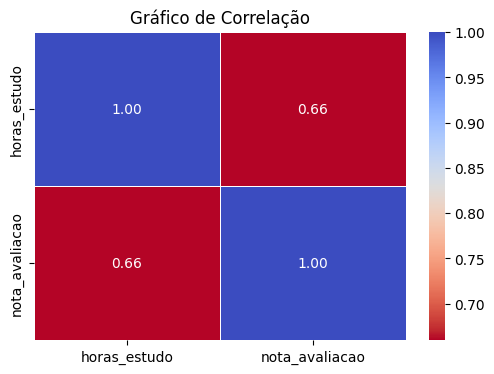

In [ ]:
# Crie o gráfico de heatmap
plt.figure(figsize=(6, 4))  # Tamanho da figura
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm_r', fmt='.2f', linewidths=0.5)
plt.title('Gráfico de Correlação')
plt.show()

Coeficiente de determinação (R²): 0.58


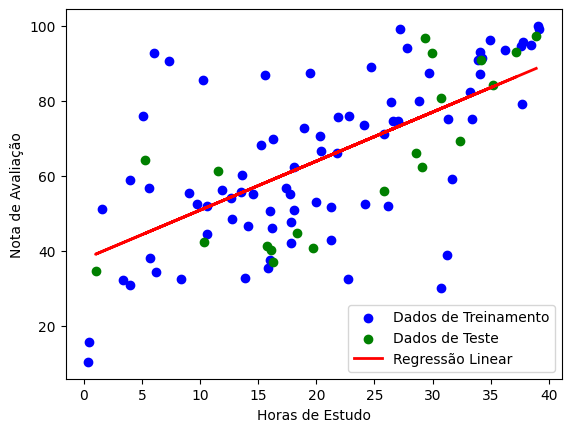

O valor do intercepto é: 37.72433032159134

O valor do coeficiente angular é: 1.3090905320121726

A nota predita na prova para um aluno que estudou 3 horas é: 41.65160191762786

A diferença entre a nota predita e a nota real do aluno que estudou 18,06 horas é: -0.9534946702688245

A nota predita na prova para um aluno que estudou 30 horas é: 76.99704628195651

O Mean Absolute Error (MAE) do modelo de regressão linear é: 12.56343376840537

O Mean Squared Error (MSE) do modelo de regressão linear é: 199.32650976618913



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Defina as variáveis independentes (características)
X = dados[['horas_estudo']]

# Defina a variável dependente (alvo)
y = dados['nota_avaliacao']

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crie o modelo de regressão linear
modelo = LinearRegression()

# Treine o modelo com os dados de treinamento
modelo.fit(X_train, y_train)

# Faça previsões com os dados de teste
y_pred = modelo.predict(X_test)

# Avalie o desempenho do modelo (opcional)
score = modelo.score(X_test, y_test)
print(f"Coeficiente de determinação (R²): {score:.2f}")

# Plote o gráfico de dispersão dos dados de treinamento e a linha de regressão
plt.scatter(X_train, y_train, color='blue', label='Dados de Treinamento')
plt.scatter(X_test, y_test, color='green', label='Dados de Teste')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel('Horas de Estudo')
plt.ylabel('Nota de Avaliação')
plt.legend()
plt.show()



# Acesse o valor do intercepto (coeficiente linear)
intercepto = modelo.intercept_

print(f"O valor do intercepto é: {intercepto}\n")

# Acesse os coeficientes angulares
coef_angular = modelo.coef_

print(f"O valor do coeficiente angular é: {coef_angular[0]}\n")

# Realize a previsão com base nas 3 horas de estudo
horas_estudo_aluno = 3
nota_predita = modelo.predict([[horas_estudo_aluno]])

print(f"A nota predita na prova para um aluno que estudou 3 horas é: {nota_predita[0]}\n")


# Realize a previsão com base nas 18,06 horas de estudo
horas_estudo_aluno = 18.06
nota_predita = modelo.predict([[horas_estudo_aluno]])

# Obtenha a nota real do aluno (você precisa substituir esse valor pelo valor real)
nota_real_aluno = 62.32

# Calcule a diferença
diferenca = nota_predita[0] - nota_real_aluno

print(f"A diferença entre a nota predita e a nota real do aluno que estudou 18,06 horas é: {diferenca}\n")


# Realize a previsão com base nas 30 horas de estudo
horas_estudo_aluno = 30
nota_predita = modelo.predict([[horas_estudo_aluno]])

print(f"A nota predita na prova para um aluno que estudou 30 horas é: {nota_predita[0]}\n")

# Calcule o MAE
mae = mean_absolute_error(y_test, y_pred)

print(f"O Mean Absolute Error (MAE) do modelo de regressão linear é: {mae}\n")

# Calcule o MAE
mae = mean_squared_error(y_test, y_pred)

print(f"O Mean Squared Error (MSE) do modelo de regressão linear é: {mae}\n")










In [ ]:
dados['horas_estudo'].mean()

20.766000000000005

In [ ]:
dados['nota_avaliacao'].mean()

64.2226